In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Steps

* Data description
* View training and testing data.
* Data set Observation by visually Analyze, identify patterns
* Feature engineering - finding null values , Outliers cleanse the data, onehot encoding and lable encoding.
* Model, predict, and find accuracy score

Data Set description

* survival - Survival (0 = No; 1 = Yes)
* ticket - Ticket Number
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
titanictest=pd.read_csv("../input/titanic/test.csv")
titanictest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanictrain=pd.read_csv("../input/titanic/train.csv")
titanictrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanictrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* integer and float columns - PassengerId , Survived ,Pclass,age ,SibSp ,Parch,fare
* Categorical columns- Survived, Sex, and Embarked.
* Ordinal- Pclass.
* Alphanumeric- Cabin ,Ticket

In [7]:
titanictrain.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
titanictrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data set Observation

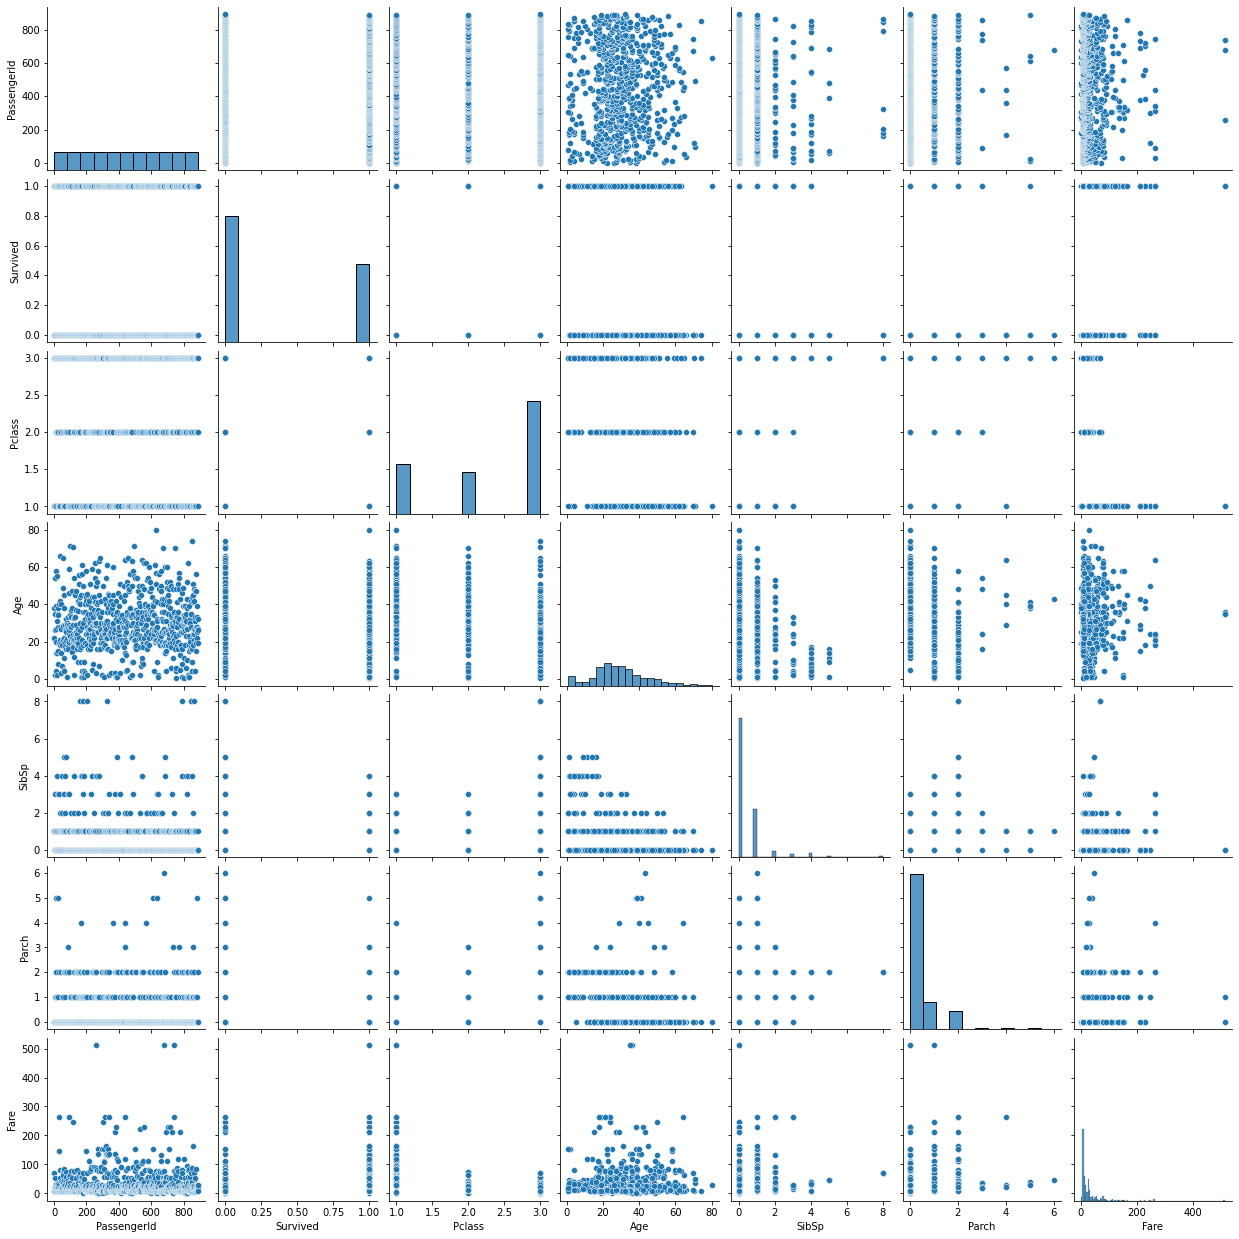

In [9]:
sns.pairplot(titanictrain)

**Survived distribution**

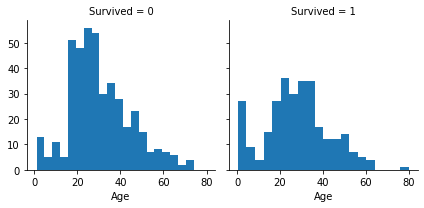

In [10]:
g = sns.FacetGrid(titanictrain, col='Survived')
g.map(plt.hist, 'Age', bins=20)

kids survived rate is more 

**AGE vs SEX on survived**

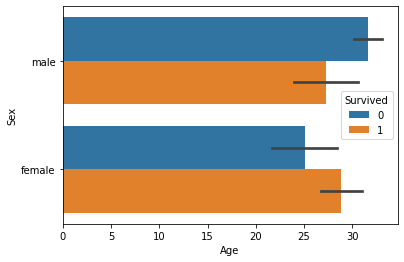

In [11]:
sns.barplot(x='Age',y='Sex',hue='Survived',data=titanictrain)
plt.show()

from above bar chart female within 30 yrs survived more than men

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


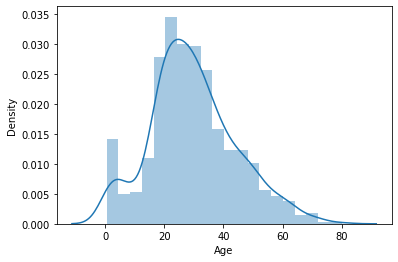

In [12]:
Agestr= titanictrain['Age']

sns.distplot(Agestr)
plt.show()

Age Distribution is good. (normal Distribution)

**Age Mean Class wise**

In [13]:
class1=titanictrain.loc[(titanictrain["Pclass"]==1) & (titanictrain['Age'] >= 0) & (titanictrain['Age'] <= 80)].Age.mean()
class1

38.233440860215055

In [14]:
class2=titanictrain.loc[(titanictrain["Pclass"]==2) & (titanictrain['Age'] >= 0) & (titanictrain['Age'] <= 80)].Age.mean()
class2

29.87763005780347

In [15]:
class3=titanictrain.loc[(titanictrain["Pclass"]==3) & (titanictrain['Age'] >= 0) & (titanictrain['Age'] <= 80)].Age.mean()
class3

25.14061971830986

from above we can infer that aged people prefered class 1

**Survived vs Class**

In [16]:
pd.crosstab([titanictrain.Sex,titanictrain.Survived],titanictrain.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [17]:
titanictrain[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:title={'center':'Notsurvived'}, xlabel='Pclass'>

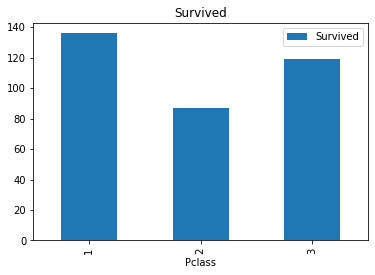

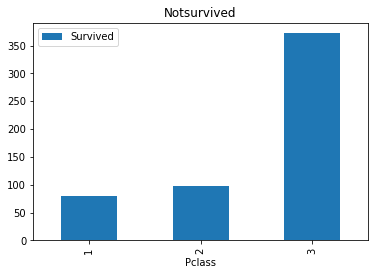

In [18]:
df=titanictrain[titanictrain['Survived']==1]

correlation=df[['Pclass','Survived']].groupby(['Pclass']).count()
correlation.plot(kind='bar' , title = "Survived")

df=titanictrain[titanictrain['Survived']==0]

correlation=df[['Pclass','Survived']].groupby(['Pclass']).count()
correlation.plot(kind='bar',title='Notsurvived')

Class 1 -survived rate is higher than class 2 and 3

**Class vs Age on Survival**

In [19]:
pd.pivot_table(titanictrain, index=['Survived'], values=['Age'], aggfunc=np.mean)


,Age
Survived,
0,30.626179
1,28.343690


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


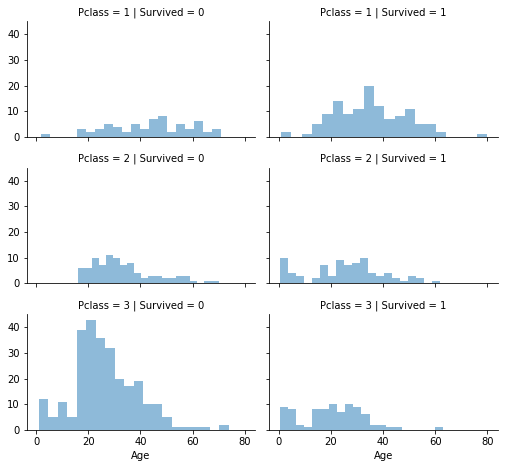

In [20]:
grid = sns.FacetGrid(titanictrain, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

* Pclass=3 had most passengers, however most did not survive.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.


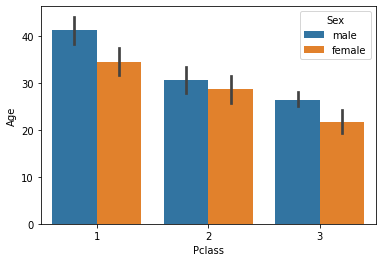

In [21]:
sns.barplot(x='Pclass',y='Age',hue='Sex',data=titanictrain)
plt.show()

Class 1,2,3 male count is more than female count

**Fare vs Embarked  on survived**

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


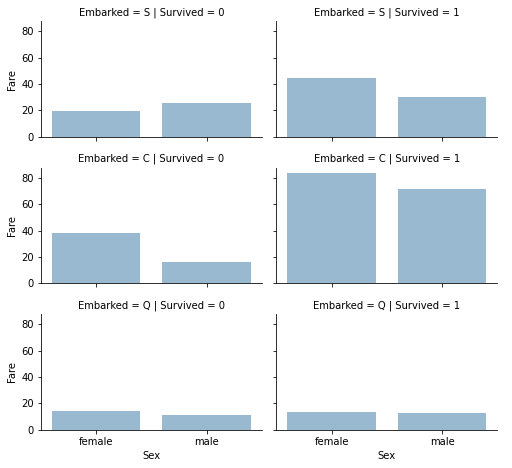

In [22]:
grid = sns.FacetGrid(titanictrain, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

* Cherbourg Survival rate and fare paid are high
* high paid ppl has better survival rate

**Embarked Vs Age vs sex( on Survival)**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

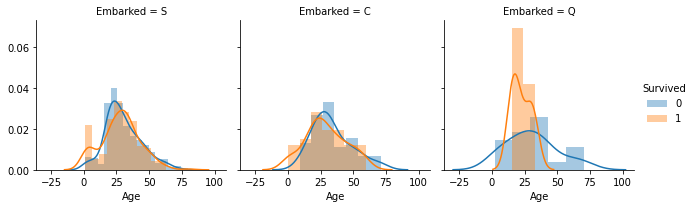

In [23]:
grid = sns.FacetGrid(titanictrain, col='Embarked', hue='Survived')
grid.map(sns.distplot, 'Age')
grid.add_legend()

**Analysis On Parent child category -Parch**

 number of ppl who dosent have parent child relatonship onboard


In [24]:
df=titanictrain[titanictrain['Parch']==0].count()
print(df)

PassengerId    678
Survived       678
Pclass         678
Name           678
Sex            678
Age            521
SibSp          678
Parch          678
Ticket         678
Fare           678
Cabin          141
Embarked       676
dtype: int64


number of ppl r with parent child relatonship onboard


In [25]:
df=titanictrain[titanictrain['Parch']==1].count()
print(df)

PassengerId    118
Survived       118
Pclass         118
Name           118
Sex            118
Age            110
SibSp          118
Parch          118
Ticket         118
Fare           118
Cabin           39
Embarked       118
dtype: int64


**Parch vs survived- genderwise**

<Figure size 432x288 with 0 Axes>

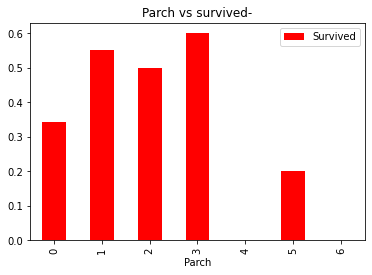

In [26]:
fig=plt.figure()
df2=titanictrain[['Survived','Parch']].groupby(['Parch']).mean()

df2.plot(kind='bar', title = "Parch vs survived-",color=['red','blue'])
plt.show()

In [27]:
titanictrain[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Small Familes survival rate is high compare to Big families

**passenger travelled with SibSp-Sibling n spouse Vs Survival Rate**


In [28]:
titanictrain[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


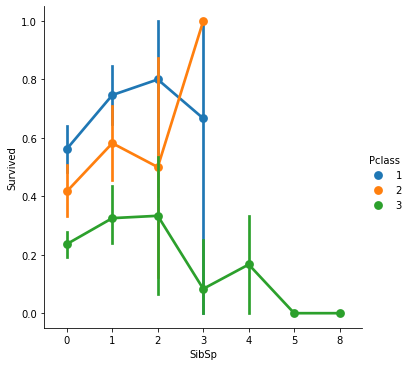

In [29]:
sns.factorplot("SibSp", "Survived", hue="Pclass", data=titanictrain)


<AxesSubplot:xlabel='SibSp'>

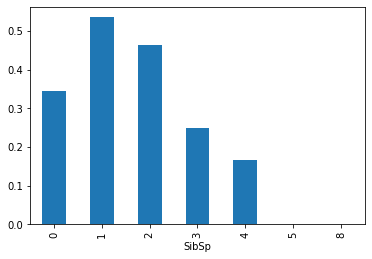

In [30]:
titanictrain.groupby('SibSp').Survived.mean().plot(kind='bar')


Sibling spouse 4 survival rate is less than 1 and 2

**Feature engineering**
* dropping highly null values feature
* Replacing Null values and outlier treatment
* Creating new relevant features
* converting Categorical features to numerical feature

**Null value checking**

<AxesSubplot:>

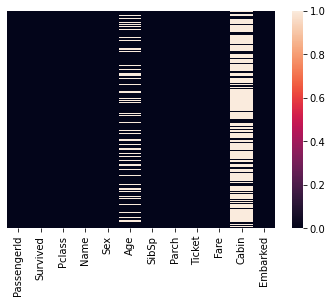

In [31]:
sns.heatmap(titanictrain.isnull(), yticklabels=False)


Cabin has more null values,ticket and passenger id also not needed, lets dropit

In [32]:
titanictrain = titanictrain.drop(['PassengerId','Ticket','Cabin'], axis=1)
titanictrain.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


Lets drop in test data set too

In [33]:
titanictest = titanictest.drop(['Ticket','Cabin'], axis=1)
titanictest.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S


**Analysing Name Column and creating new feature
**

In [34]:
traintest= [titanictrain, titanictest]
for i in traintest:
  i['Title'] =i.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(titanictrain['Title'],titanictrain['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [35]:
titanictrain['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [36]:
pd.crosstab(titanictest['Title'],titanictest['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


*lets* change titles into dictionary

In [37]:
title_dic = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

map  title dictionary to Title feature vector


In [38]:
titanictrain.Title = titanictrain.Title.map(title_dic)
titanictrain.groupby('Title').Title.count()

Title
Master      40
Miss       184
Mr         517
Mrs        127
Officer     18
Royalty      4
Name: Title, dtype: int64

In [39]:
titanictest.Title = titanictest.Title.map(title_dic)
titanictest.groupby('Title').Title.count()

Title
Master      21
Miss        78
Mr         240
Mrs         73
Officer      5
Royalty      1
Name: Title, dtype: int64

In [40]:
titanictrain['Title'].nunique()

6

In [41]:
titanictest['Title'].nunique()

6

Lets drop Name column from test and train

In [42]:
titanictrain = titanictrain.drop(columns='Name')

In [43]:
titanictrain.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [44]:
titanictest = titanictest.drop(columns='Name')

In [45]:
titanictest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


In [46]:
r=titanictrain["Age"][np.isnan(titanictrain["Age"])]
r

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

count of passenger titlewise
* Master 40
* Miss 184
* Mr 517
* Mrs 127
* Officer 18
* Royalty 4

In [47]:
titanictest.groupby('Title').Age.count()

Title
Master      17
Miss        64
Mr         183
Mrs         62
Officer      5
Royalty      1
Name: Age, dtype: int64

In [48]:
titanictrain.groupby('Title').Age.count()

Title
Master      36
Miss       148
Mr         398
Mrs        110
Officer     17
Royalty      4
Name: Age, dtype: int64

title has more impact on the age of passenegers ,so Replacing null Age by taking title wise mean


In [49]:
r=titanictest["Age"][np.isnan(titanictest["Age"])]
r

10    NaN
22    NaN
29    NaN
33    NaN
36    NaN
       ..
408   NaN
410   NaN
413   NaN
416   NaN
417   NaN
Name: Age, Length: 86, dtype: float64

In [50]:
titanictrain.groupby('Title').Age.mean()

Title
Master      4.574167
Miss       21.804054
Mr         32.368090
Mrs        35.718182
Officer    46.705882
Royalty    43.750000
Name: Age, dtype: float64

In [51]:
titanictest.groupby('Title').Age.mean()

Title
Master      7.406471
Miss       21.774844
Mr         32.000000
Mrs        38.903226
Officer    44.800000
Royalty    39.000000
Name: Age, dtype: float64

**Replacing missing values of age ,title wise for both test and train**

In [52]:
titanictrain.loc[(titanictrain['Title']=='Miss')&(pd.isnull(titanictrain.Age)), 'Age'] =21

In [53]:
titanictest.loc[(titanictest['Title']=='Miss')&(pd.isnull(titanictest.Age)), 'Age'] =21

In [54]:
titanictrain.loc[(titanictrain['Title']=='Master')&(pd.isnull(titanictrain.Age)), 'Age'] =4

In [55]:
titanictest.loc[(titanictest['Title']=='Master')&(pd.isnull(titanictest.Age)), 'Age'] =7

In [56]:
titanictrain.loc[(titanictrain['Title']=='Mr')&(pd.isnull(titanictrain.Age)), 'Age'] =32

In [57]:
titanictest.loc[(titanictest['Title']=='Mr')&(pd.isnull(titanictest.Age)), 'Age'] =32

In [58]:
titanictrain.loc[(titanictrain['Title']=='Officer')&(pd.isnull(titanictrain.Age)), 'Age'] =46

In [59]:
titanictest.loc[(titanictest['Title']=='Officer')&(pd.isnull(titanictest.Age)), 'Age'] =44

In [60]:
titanictrain.loc[(titanictrain['Title']=='Royalty')&(pd.isnull(titanictrain.Age)), 'Age'] =43

In [61]:
titanictest.loc[(titanictest['Title']=='Royalty')&(pd.isnull(titanictest.Age)), 'Age'] =39

In [62]:
titanictrain.loc[(titanictrain['Title']=='Mrs')&(pd.isnull(titanictrain.Age)), 'Age'] =35

In [63]:
titanictest.loc[(titanictest['Title']=='Mrs')&(pd.isnull(titanictest.Age)), 'Age'] =38

In [64]:
titanictrain['Age'].isnull().sum()

0

In [65]:
titanictest['Age'].isnull().sum()

0

All the null values are replaced for test and train

Replace Null for Fare in test data

In [66]:
titanictest['Fare'].mean()

35.6271884892086

In [67]:
titanictest.loc[((pd.isnull(titanictest.Fare))), 'Fare'] =35

In [68]:
(titanictest['Fare']).isnull().sum()

0

Converting categorical columns to num via dummy encoding

In [69]:
titanictrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


drop_first=True -> to avoid multicollnearity problem

In [70]:
titanictrain = pd.get_dummies(titanictrain, columns=['Title','Sex', 'Embarked'],drop_first=True)
titanictest = pd.get_dummies(titanictest, columns=['Title','Sex','Embarked'],drop_first=True)

In [71]:
titanictrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,1,0,1


**Scaling Continouse variables(Age,Fare) with minmax scalar**

In [72]:
cvar = ['Age', 'Fare']
scaler = MinMaxScaler()
scaler.fit(titanictrain[cvar])
titanictrain[cvar] = scaler.transform(titanictrain[cvar])
titanictest[cvar] = scaler.transform(titanictest[cvar])

In [73]:
titanictrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_male,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,0.014151,0,1,0,0,0,1,0,1
1,1,1,0.472229,1,0,0.139136,0,0,1,0,0,0,0,0
2,1,3,0.321438,0,0,0.015469,1,0,0,0,0,0,0,1
3,1,1,0.434531,1,0,0.103644,0,0,1,0,0,0,0,1
4,0,3,0.434531,0,0,0.015713,0,1,0,0,0,1,0,1


In [74]:
titanictest.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_male,Embarked_Q,Embarked_S
0,892,3,0.428248,0,0,0.015282,0,1,0,0,0,1,1,0
1,893,3,0.585323,1,0,0.013663,0,0,1,0,0,0,0,1
2,894,2,0.773813,0,0,0.018909,0,1,0,0,0,1,1,0
3,895,3,0.334004,0,0,0.016908,0,1,0,0,0,1,0,1
4,896,3,0.271174,1,1,0.023984,0,0,1,0,0,0,0,1


In [75]:
titanictrain.isnull().sum()

Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [76]:
titanictest.isnull().sum()

PassengerId      0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64

**Model creation**

In [77]:
x_train = titanictrain.drop("Survived", axis=1)
y_train = titanictrain["Survived"]
x_test  = titanictest.drop("PassengerId", axis=1).copy()
print(x_train.shape, y_train.shape, x_test.shape)

(891, 13) (891,) (418, 13)


**KNN model**

In [78]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score_knn = round(knn.score(x_train, y_train) * 100, 2)
score_knn

87.21

Random Forest

In [79]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred_rand = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
random_forest_score = round(random_forest.score(x_train,y_train) * 100, 2)
random_forest_score

98.2

**Confusion Matrix**

In [80]:
submission = pd.DataFrame({
        "PassengerId": titanictest["PassengerId"],
        "Survived": y_pred_rand
    })

In [81]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [82]:
submission.to_csv('./submission.csv', index=False)